# ラベルを付けて、学習に使うデータセットを作成する

In [116]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import stockpy as st
from datetime import datetime
from tqdm import tqdm

In [117]:
df = pd.read_csv('./train_dataset_by_time.csv', header=0)

In [118]:
def process_data(data):
    try:
        data.pop()
        if ((0.05 < data[-1] - data[-2])):        
            data.insert(1, 1)
        else:
            data.insert(1, 0)
        # リストをNumPy配列に変換
        data = np.array([data])
        return data
    except Exception as e:
        print("Error processing data")
        print(e)
        raise Exception

In [119]:
df3 = pd.DataFrame()

for index, row in tqdm(df.iterrows()):
    row = process_data(row.tolist())
    df_2 = pd.DataFrame(row)
    df3 = pd.concat([df3, df_2], axis=0)

0it [00:00, ?it/s]

31160it [15:29, 16.24it/s] 

In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,AADI,0,0.9508081636132556,0.9409698365470528,0.9560787055442324,0.9216444267753692,0.9367533627911252,0.9757554937137916,0.9434294183136036,0.9518622988068816,...,0.8735067255822507,0.9082923827489894,0.8640197098953465,0.8464511921130394,0.8373155548240105,0.8738581039801261,0.8485593954817148,0.8773717539217261,0.8605059929351697,0.797259355726295
0,AAL,0,0.8809523993134574,0.8823000533560639,0.8975740941957736,0.8912848135035484,0.8773585123914681,0.8769092658155916,0.8935309606979079,0.8602874852482523,...,0.8203054825304946,0.8203054825304946,0.816262349032629,0.8328841295999684,0.8108714758071336,0.8117699689588866,0.8068283423092679,0.8423180506383063,0.8544474511319035,0.8391734102921936
0,AAME,0,0.9556540085522232,0.9756096617007152,0.9600885861954972,0.9423502756224014,0.9201773874060316,0.9423502756224014,0.9290465426925796,0.90687365447621,...,0.6873613623352783,0.7117516468808037,0.678492153294971,0.6940132825539486,0.6385809007517463,0.6164079050278579,0.5432372126525599,0.5964523056331252,0.6208425364248912,0.6607538427218753
0,AAOI,0,0.4651162805024853,0.474160230596978,0.4664082689726364,0.4625323035621831,0.4793281844775823,0.4786821748407893,0.4857881268283379,0.4844961383581868,...,0.3527131911890347,0.3643410874203946,0.3611111316467343,0.3540051796591859,0.342377283427826,0.3456072392014862,0.3320413448631822,0.3404392853208818,0.3417312737910329,0.3249354236790686
0,AAON,0,0.6217600428642379,0.6391952028533713,0.6457449693994339,0.6535860619814988,0.6592132837839262,0.65072636686221,0.6480511161629882,0.6523868506077631,...,0.7277243838964857,0.7274466417887172,0.738927312121042,0.7346684205556477,0.7380013796227526,0.73300169903962,0.735408940703969,0.7252245973788028,0.7309648518841401,0.7020781132336021
0,AAPL,0,0.7100358282158964,0.72439674781066,0.7298387633062758,0.738455423951666,0.7495913763393776,0.7521108236367448,0.753219464447311,0.7492387330508194,...,0.8863296281417744,0.8895591064451511,0.9099967061219078,0.90474851221321,0.9052027329465976,0.8992481635754639,0.896068929551842,0.918474456111505,0.906817394320763,0.8826963289398106
0,ABCB,0,0.938027396441334,0.9520978417417024,0.9358628269706531,0.9313530652291264,0.937486307198017,0.961838864770826,0.9672506071936464,0.9815013919642972,...,0.8812045259965438,0.8876986594034106,0.8974398240974757,0.90321217462839,0.906459205915588,0.8994028751891493,0.898860156799007,0.9303417900456156,0.9531391498927704,0.9448163345910584
0,ABCL,0,0.8753525582892427,0.8973491403376168,0.8759165332168054,0.8618161380416983,0.9007332588466876,0.9046814060720602,0.919345722385991,0.9007332588466876,...,0.8685843212711011,0.8420756170697917,0.8319233153313182,0.7732656735544222,0.7710096124779546,0.8087986758503408,0.8065426147738732,0.7975183704680029,0.7484490017132789,0.691483392296549
0,ABEO,0,0.9072164948453608,0.9175257731958762,0.9381443298969072,0.9175257731958762,0.9278350515463918,0.9278350515463918,0.9278350515463918,0.8865979381443299,...,0.3402061855670103,0.3711340206185567,0.3298969072164948,0.3092783505154639,0.2989690721649484,0.3298969072164948,0.3505154639175257,0.3814432989690721,0.3608247422680412,0.3298969072164948
0,ABIO,0,1.0,0.986062730505916,0.9721254610118318,0.9512195567707058,0.9547038741442267,0.9616725088912688,0.9651568262647898,0.9303136525295796,...,0.8432056351188754,0.8571429046129594,0.8188153304315493,0.7770035219492971,0.766550569828734,0.7700348872022551,0.749128982961129,0.8013937435639442,0.7700348872022551,0.728222995647324


In [ ]:
df3.to_csv('labeled_train_dataset.csv', index=False)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,AADI,1,0.9508081636132556,0.9409698365470528,0.9560787055442324,0.9216444267753692,0.9367533627911252,0.9757554937137916,0.9434294183136036,0.9518622988068816,...,0.8735067255822507,0.9082923827489894,0.8640197098953465,0.8464511921130394,0.8373155548240105,0.8738581039801261,0.8485593954817148,0.8773717539217261,0.8605059929351697,0.797259355726295
0,AAL,1,0.8809523993134574,0.8823000533560639,0.8975740941957736,0.8912848135035484,0.8773585123914681,0.8769092658155916,0.8935309606979079,0.8602874852482523,...,0.8203054825304946,0.8203054825304946,0.816262349032629,0.8328841295999684,0.8108714758071336,0.8117699689588866,0.8068283423092679,0.8423180506383063,0.8544474511319035,0.8391734102921936
0,AAME,1,0.9556540085522232,0.9756096617007152,0.9600885861954972,0.9423502756224014,0.9201773874060316,0.9423502756224014,0.9290465426925796,0.90687365447621,...,0.6873613623352783,0.7117516468808037,0.678492153294971,0.6940132825539486,0.6385809007517463,0.6164079050278579,0.5432372126525599,0.5964523056331252,0.6208425364248912,0.6607538427218753
0,AAOI,1,0.4651162805024853,0.474160230596978,0.4664082689726364,0.4625323035621831,0.4793281844775823,0.4786821748407893,0.4857881268283379,0.4844961383581868,...,0.3527131911890347,0.3643410874203946,0.3611111316467343,0.3540051796591859,0.342377283427826,0.3456072392014862,0.3320413448631822,0.3404392853208818,0.3417312737910329,0.3249354236790686
0,AAON,1,0.6217600428642379,0.6391952028533713,0.6457449693994339,0.6535860619814988,0.6592132837839262,0.65072636686221,0.6480511161629882,0.6523868506077631,...,0.7277243838964857,0.7274466417887172,0.738927312121042,0.7346684205556477,0.7380013796227526,0.73300169903962,0.735408940703969,0.7252245973788028,0.7309648518841401,0.7020781132336021


In [ ]:
# カテゴリごとのカウントを取得
value_counts = df3[1].value_counts()
# 最も少ないカウント数を取得
min_count = value_counts.min()
# 最も少ないカウント数のカテゴリを取得
min_count_categories = value_counts[value_counts == min_count].index
# フィルタリング
filtered_df_1 = df3[df3[1].isin(min_count_categories)]
# カテゴリごとのカウントを取得
value_counts = df3[1].value_counts()
# 最も少ないカウント数を取得
max_count = value_counts.max()
# 最も少ないカウント数のカテゴリを取得
max_count_categories = value_counts[value_counts == max_count].index
# フィルタリング
filtered_df_2 = df3[df3[1].isin(max_count_categories)][:min_count]
result = pd.concat([filtered_df_1, filtered_df_2], axis=0)

In [ ]:
result.to_csv('filtered_labeled_train_dataset.csv', index=False)

In [46]:
data = process_data(df, "Close", "aaa")

Error processing data
-1


Exception: 

In [795]:
df = pd.DataFrame()
for name in df['0']:
    print(name)
    try:
        data = process_data(data, "Close", name)
        df_2 = pd.DataFrame(data)
        df = pd.concat([df, df_2], axis=0)
    except Exception as e:
        print(e)
        continue

AACI
AADI
AAL
AAME
AAOI
AAON
AAPL
ABCB
ABCL
ABEO
ABIO
ABL
ABNB
ABOS
ABSI
ABUS
ABVC
ACAB
ACAD
ACAH
ACAX
ACB
ACBA
ACCD
ACDC
ACER
ACET
ACGL
ACGN
Not enough data 41

ACHC
ACHV
ACIC
ACIU
ACIW
ACLS
ACLX
ACMR
ACNB
ACNT
ACOR
ACRS
ACRX
ACST
ACTG
ACVA
ACXP
ADBE
ADD
ADES
ADI
ADIL
ADMA
ADN
ADOC
ADP
ADPT
ADSE
ADSK
ADTH
ADTN
ADTX
ADUS
ADV
ADVM
AEHL
AEHR
AEI
AEIS
AEMD
AENT
AEP
AEY
AEYE
AEZS
AFBI
AFIB
AFMD
AFRI
AFRM
AFYA
AGAE
AGBA
AGEN
AGFY
AGIL
AGIO
AGLE
AGMH
AGRI
AGRX
AGYS
AHCO
AIB
AIP
AIRG
AIRS
AIRT
AKAM
AKAN
AKBA
AKLI
AKRO
AKTS
AKU
AKYA
ALBT
ALCO
ALDX
ALEC
ALGM
ALGN
ALGS
ALGT
ALHC
ALIM
ALKS
ALKT
ALLK
ALLO
ALLR
ALLT
ALNT
ALNY
ALOT
ALPN
ALPP
ALRM
ALRN
ALRS
ALSA
ALT
ALTI
ALTO
ALTR
ALTU
ALVO
ALVR
ALXO
ALYA
ALZN
AMAL
AMAM
Not enough data 39

AMAO
AMAT
AMBA
AMCX
AMD
AMED
AMEH
AMGN
AMKR
AMLX
AMNB
AMPG
AMPH
AMPL
AMRK
AMRS
AMSC
AMSF
AMST
AMSWA
AMTI
AMTX
AMWD
AMZN
ANAB
ANDE
ANEB
ANGI
ANGO
ANIK
ANIP
ANIX
ANNX
ANSS
ANTX
ANY
ANZU
Not enough data 60

AOGO
AONC
AOSL
AOUT
APA
APCX
APDN
APEI
APLM
APLS
APLT
APM
APO

ARBG: No data found, symbol may be delisted


Not enough data 0

ARCB
ARCE
ARCK


ARCK: No data found, symbol may be delisted


Not enough data 0

ARCT
ARDX
AREB
AREC
ARHS
ARIZ
ARKO
ARKR
ARM
Not enough data 17

AROW
ARQQ
ARQT
ARRW
ARRY
ARTE
ARTL
ARTNA
ARTW
ARVL
ARVN
ARWR
ARYD
ASCA
ASLE
ASMB
ASO
ASPA
ASPS
ASRT
ASRV
ASTC
ASTE
ASTL
ASTR
ASTS
ASUR
ASYS
ATAI
ATAK
ATEC
ATER
ATEX
ATHA
ATHX
ATLC
ATLO
ATNF
ATNI
ATOM
ATOS
ATRA
ATRC
ATRI
ATRO
ATSG
ATVI
ATXI
ATXS
AUBN
AUDC
AUGX
AUID
AUPH
AUR
AURA
AUUD
AUVI
AVAH
AVAV
AVDX
AVGO
AVGR
AVHI
AVID
AVIR
AVNW
AVO
AVPT
AVRO
AVT
AVTA
AVTE
AVTX
AVXL
AWH
AWIN
AWRE
AXDX
AXGN
AXLA
AXNX
AXON
AXSM
AXTI
AY
AYRO
AYTU
AZPN
AZTA
BACK
BAER
BAFN
BAND
BANF
BANR
BASE
BBAI
BBCP
BBGI
BBIO
BBLG
BBSI
BCAB
BCBP
BCDA
BCEL
BCLI
BCML
BCOV
BCOW
BCPC
BCRX
BCSA
BCTX
BDSX
BDTX
BECN
BEEM
BELFA
BELFB
BENF
BETR
BETS
BFC
BFI
BFIN
BFST
BGC
BGFV
BHF
BIGC
BIIB
BIMI
BIOC
BIOL
BIOR
BIOX
BIRD
BITF
BIVI
BJDX
BJRI
BKNG
BKR
BKYI
BL
BLBD
BLBX
BLDE
BLDP
BLDR
BLEU
BLFS
BLFY
BLIN
BLKB
BLMN
BLNK
BLPH
BLTE
BLUE
BLZE
BMBL
BMEA
BMRA
BMRC
BMRN
BMTC


BMTC: No data found, symbol may be delisted


Not enough data 0

BNGO
BNIX
BNMV
BNTC
BOCN
BOKF
BOLT
BON
BOOM
BOSC
BOTJ
BOXL
BPMC
BPOP
BPRN
BPTH
BRAC
BRAG
BRCC
BREZ
BRFH
BRID
BRKH
BRKL
BRKR
BRLT
BROG
BRP
BRPM


BRPM: No data found, symbol may be delisted


Not enough data 0

BRQS
BRTX
BRY
BRZE
BSBK
BSET
BSFC
BSGM
BSQR
BSRR
BSVN
BSY
BTAI
BTBD
BTBT
BTCS
BTCY
BTDR
BTMD
BTOG
BTTX
BTWN
BUSE
BVS
BWAQ
BWB
BWC


BWC: No data found, symbol may be delisted


Not enough data 0

BWEN
BWFG
BWMN
BWMX
BWV
BXRX
BYFC
BYND
BYNO
BYRN
BYSI
BYTS
BZFD
CAAS
CABA
CAC
CACC
CACO
CADL
CAKE
CALB
CALC
CALM
CAMP
CAMT
CAPR
CAR
CARA
CARE
CARG
CARM
CART
Not enough data 14

CARV
CASA
CASH
CASI
CASS
CASY
CATC
CATY
CBAN
CBAT
CBAY
CBFV
CBIO
CBNK
CBRG
CBRL
CBSH
CBUS
CCB
CCBG
CCCC
CCCS
CCEP
CCG
Not enough data 14

CCLD
CCNE
CCOI
CCRN
CCSI
CCTS
CDAQ
CDIO
CDLX
CDMO
CDNA
CDNS
CDRO
CDT
CDTX
CDW
CDXC
CDXS
CDZI
CEAD
CECO
CEG
CEGVV


CEGVV: No data found, symbol may be delisted


Not enough data 0

CELC
CELH
CELL
Not enough data 61

CELU
CELZ
CENN
CENT
CENTA
CENX
CERE
CERS
CERT
CETX
CEVA
CFB
CFBK
CFFI
CFFN
CFFS
CFIV
CFLT
CFRX
CFSB
CGC
CGEM
CGEN
CGNT
CGNX
CGRN
CGTX
CHCO
CHDN
CHEF
CHEK
CHK
CHKP
CHMG
CHRD
CHRS
CHRW
CHTR
CHUY
CHX
Not enough data 66

CIFR
CIGI
CINF
CING
CISO
CISS
CIVB
CIZN
CJET
CKPT
CLAQ


CLAQ: No data found, symbol may be delisted


Not enough data 0

CLAR
CLAY
CLBK
CLBT
CLDX
CLEU
CLFD
CLGN
CLIR
CLMB
CLNE
CLNN
CLOE
CLOV
CLPS
CLPT
CLRB
CLRO
CLSD
CLSK
CLST
CLVR
CLWT
CMAX
CMBM
CMCA
CMCO
CMCSA
CME
CMLS
CMPO
CMPR
CMPX
CMRA
CMRX
CMTL
CNDT
CNET
CNEY
CNFR
CNGL
CNOB
CNSL
CNSP
CNTG
CNTX
CNTY
CNVS
CNXC
CNXN
COCO
COCP
CODA
CODX
COEP
COFS
COGT
COHU
COIN
COKE
COLB
COLL
COLM
COMM
COMS
CONN
CONX
COO
COOL
COOP
CORT
COSM
COST
CPE
CPHC
CPIX
CPOP
CPRT
CPRX
CPSH
CPSI
CPSS
CPTN
CRAI
CRBP
CRBU
CRCT
CRDF
CRDL
CRDO
CREG
CREX
CRGO
CRIS
CRKN
CRMD
CRMT
CRNC
CRNT
CRNX
CRON
CROX
CRSP
CRSR
CRUS
CRVL
CRVO
Not enough data 41

CRVS
CRWD
CRWS
CSBR
CSCO
CSGP
CSGS
CSIQ
CSLM
CSPI
CSSE
CSTA
CSTE
CSTL
CSWI
CSX
CTAS
CTBI
CTCX
CTG
CTGO
CTHR
CTKB
CTLP
CTMX
CTRM
CTRN
CTSH
CTSO
CTXR
CUE
CUEN
CULL
CURI
CUTR
CVAC
CVBF
CVCO
CVCY
CVGI
CVGW
CVLG
CVLT
CVLY
CVRX
CVV
CWBC
CWBR
CWCO
CWST
CXAI
CXDO
CYAN
CYBR
CYCC
CYCN
CYN
CYRX
CYT
CYTH
CYTK
CYTO
CZNC
CZR
CZWI
DAIO
DAKT
DALN
DARE
DASH
DATS
DAVE
DAWN
DBGI
DBX
DCBO
DCFC
DCGO
DCOM
DCPH
DCRD


DCRD: No data found, symbol may be delisted


Not enough data 0

DCTH
DDOG
DENN
DFLI
DGHI
DGICA
DGICB
DGII
DGLY
DH
DHAC
DHCA
DHIL
DIBS
DIOD
DISH
DJCO
DKDCA
DKNG
DLHC
DLO
DLPN
DLTH
DLTR
DMAC
DMAQ
DMK
DMRC
DMTK
DNAB


DNAB: No data found, symbol may be delisted


Not enough data 0

DNLI
DNTH
DNUT
DOCU
DOMH
DOMO
DOOO
DORM
DOX
DPCS
DPRO
DRCT
DRIO
DRMA
DRRX
DRTS
DRUG
DRVN
DSGN
DSGR
DSGX
DSKE
DSP
DSWL
DTIL
DTSS
DTST
DUET
DUNE
DUOL
DUOT
DVAX
DWAC
DWSN
DXCM
DXLG
DXPE
DXR
DXYN
DYAI
DYN
DYNT
DZSI
EA
EAC
EAR
EAST
EBAY
EBC
EBET
EBIX
EBMT
EBON
EBTC
ECOR
ECPG
ECX
EDBL
EDIT
EDRY
EDSA
EDTK
EDUC
EEFT
EEIQ
EFOI
EFSC
EFTR
EGAN
EGBN
EGHT
EGIO
EGLX
EGRX
EHTH
EIGR
EJH
EKSO
ELDN
ELEV
ELF
ELOX
ELSE
ELTK
ELTX
ELUT
ELYM
ELYS
EMBC
EMKR
EML
EMLD
ENCP
ENG
ENLV
ENPH
ENSC
ENSG
ENTA
ENTG
ENTX
ENVB
ENVX
EOLS
EOSE
EPIX
EPOW
EPSN
EQ
EQRX
ERAS
ERIE
ERII
ERNA
ESAC
ESCA
ESEA
ESGR
ESLT
ESOA
ESPR
ESQ
ESSA
ESTA
ETAO
ETNB
ETON
ETSY
EUDA
EVBG
EVCM
EVER
EVGN
EVGO
EVGR
EVLO
EVLV
EVOK
EVRG
EWBC
EWCZ
EWTX
EXAS
EXC
EXEL
EXFY
EXLS
EXPD
EXPE
EXPI
EXPO
EXTR
EYE
EYEN
EYPT
EZFL
EZGO
EZPW
FA
FAMI
FANG
FARM
FARO
FAST
FAT
FATE
FATP
FBIO
FBIZ
FBMS
FBNC
FBRX
FCAP
FCBC
FCCO
FCCY


FCCY: No data found, symbol may be delisted


Not enough data 0

FCEL
FCFS
FCNCA
FCUV
FDBC
FDMT
FEAM
FEIM
FELE
FEMY
FENC
FEXD
FFBC
FFIC
FFIE
FFIN
FFIV
FFNW
FGBI
FGEN
FGI
FHB
FHLT
FHTX
FIAC
FIBK
FICV
FINW
FISI
FITB
FIVE
FIXX
FIZZ
FKWL
FLDM


FLDM: No data found, symbol may be delisted


Not enough data 0

FLEX
FLGC
FLGT
FLIC
FLL
FLME
FLNC
FLNT
FLUX
FLWS
FLXS
FLYW
FMAO
Not enough data 66

FMBH
FMNB
FNCB
FNCH
FNGR
FNKO
FNLC
FNVT
FNWB
FNWD
FOLD
FONR
FORA
FORD
FORM
FORR
FOSL
FOX
FOXA
FOXF
FPAY
FRAF
FRBA
FREE
FREQ
FRGI
FRGT
FRHC
FRLA
FRME
FROG
FRPH
FRPT
FRSH
FRST
FRTX
FSBC
FSBW
FSEA
FSFG
FSLR
FSRX
FSTR
FTCI
FTDR
FTEK
FTFT
FTHM
FTNT
FTRE
FULC
FULT
FUNC
FUSB
FUSN
FUV
FVCB
FWBI
FWONA
FWRD
FWRG
FXNC
FYBR
GABC
GAIA
GALT
GAMB
GAMC
GAN
GANX
GASS
GATE
GBIO
GBNH
GBNY
GCBC
GCMG
GCTK
GDEN
GDNR
GDRX
GDYN
GEG
GEHC
GEN
GEOS
GERN
GEVO
GFAI
GFS
GGE
GGPI


GGPI: No data found, symbol may be delisted


Not enough data 0

GGR
GH
GHIX
GHRS
GHSI
GIA
GIFI
GIGM
GIII
GILD
GILT
GLBE
GLBS
GLBZ
GLDD
GLLI
GLMD
GLNG
GLRE
GLSI
GLTO
GLUE
GLYC
GMBL
GMDA
GMFI
GMGI
GNLN
GNPX
GNSS
GNTX
Not enough data 66

GO
GOCO
GOEV
GOGL
GOGO
GOOG
GOOGL
GOSS
GOVX
GP
GPAC
GPRE
GPRO
GRAB
GREE
GRI
GRIN
GRNQ
GROM
GROW
GRPH
GRPN
GRRR
GRTS
GRTX
GRWG
GSBC
GSD
GSHD
GSIT
GSM
GSMG
GT
GTAC
GTBP
GTEC
GTHX
GTIM
GTLB
GTX
GURE
GVP
GWRS
HA
HAFC
HAIA
HAIN
HALL
HALO
HAPP


HAPP: No data found, symbol may be delisted


Not enough data 0

HARP
HAS
HAYN
HBAN
HBCP
HBIO
HBNC
Not enough data 66

HBT
HCAT
HCCI
HCDI
HCKT
HCMA
HCP
HCSG
HCTI
HCVI
HCWB
HDSN
HEAR
HEES
HELE
HEPA
HFBL
HFFG
HFWA
HHGC
HHS
HIBB
HIFS
HIHO
HITI
HIVE
HLIT
HLMN
HLNE
HLT
HLTH
HLVX
HMNF
HMST
HNRG
HNST
HOFT
HOFV
HOLI
HOLX
HON
HONE
HOOD
HOOK
HOPE
HOTH
HOUR
HOWL
HPK
HPLT
HQI
HQY
HRMY
HROW
HRTX
HSDT
HSIC
HSII
HSON
HSTM
HSTO
HTBI
HTBK
HTCR
HTLD
HTLF
HTOO
HTZ
HUBC
HUBG
HUDI
HUGE
HUMA
HURC
HURN
HUT
HWBK
HWC
HWEL
HWKN
HYFM
HYMC
HYPR
HYZN
HZNP
IAC
IART
IAS
IBCP
IBEX
IBKR
IBOC
IBRX
IBTX
ICAD
ICCC
ICCH
ICCM
ICFI
ICHR
ICLR
ICPT
ICU
ICUI
ICVX
IDAI
IDCC
IDEX
IDN
IDXX
IDYA
IESC
IFBD
IFRX
IGIC
IGMS
IGTA
IHRT
III
IIIV
IINN
IKNA
IKT
ILMN
IMAQ
IMCC
IMGN
IMKTA
IMMR
IMMX
IMNM
IMNN
IMPL
IMPP
IMRA


IMRA: No data found, symbol may be delisted


Not enough data 0

IMRX
IMTE
IMTX
IMUX
IMVT
IMXI
INAB
INAQ
Not enough data 39

INBK
INBS
INBX
INCY
INDB
INDI
INDP
INFN
INGN
INKT
INM
INMB
INMD
INNV
INO
INOD
INPX
INSE
INSG
INSM
INTA
INTC
INTE
INTG
INTU
INTZ
INVA
INVE
INVO
INVZ
INZY
IOAC
IOBT
IONM
IONS
IOSP
IOVA
IPA
IPAR
IPDN
IPGP
IPSC
IPW
IPWR
IRAA
IRBT
IRDM
IREN
IRIX
IRMD
IRON
IROQ
IRTC
IRWD
ISPC
ISPO
ISRG
ISSC
ISTR
ISUN
ITAQ
ITCI
ITI
ITIC
ITOS
ITRI
ITRM
ITRN
IVAC
IVCB
IVCP
IVDA
IVVD
IXAQ
IZEA
JACK
JAGX
JAKK
JAMF
JAN
JANX
JAQC
JAZZ
JBHT
JBLU
JBSS
JCTCF
JGGC
JJSF
JKHY
JOAN
JOUT
JRSH
JRVR
JSPR
JTAI
Not enough data 64

JVA
JWEL
JYAC


JYAC: No data found, symbol may be delisted


Not enough data 0

JYNT
JZXN
KA
KACL
KAII


KAII: No data found, symbol may be delisted


Not enough data 0

KALA
KALU
KALV
KARO
KAVL
KBNT
KDP
KE
KELYA
KELYB
KEQU
KERN
KFFB
KFRC
KHC
KIDS
KINS
KIRK
KLAC
KLIC
KLTR
KLXE
KMDA
KNDI
KNSA
KNTE
KOD
KOPN
KOSS
KPRX
KPTI
KRMD
KRNL
KRNT
KRNY
KRON
KROS
KRT
KRTX
KRUS
KRYS
KSCP
KTCC
KTOS
KTRA
KTTA
KURA
KVHI
KVSA
KXIN
KYCH
KYMR
KZR
LABP
LAES
LAKE
LANC
LARK
LASR
LATG
LAUR
LAZR
LAZY
LBAI
LBC
LBPH
LBRDA
LBRDK
LBTYA
LBTYB
LBTYK
LCA
LCAA
LCFY
LCID
LCNB
LCUT
LDWY
Not enough data 64

LE
LECO
LEDS
LEE
LEGH
LESL
LEXX
LFAC
LFCR
LFMD
LFST
LFUS
LFVN
LGIH
LGMK
LGND
LGO
LGST
LGVC
LGVN
LIBY
LIDR
LILA
LILAK
LILM
LINC
LIND
LINK
LIQT
LITE
LITM
LIVB
LIVE
LIVN
LIXT
LJAQ


LJAQ: No data found, symbol may be delisted


Not enough data 0

LKCO
LKFN
LKQ
LMAT
LMB
LMDX
LMFA
LMNR
LNSR
LNT
LNTH
LNW
LNZA
LOCO
LOGI
LOOP
LOPE
LOVE
LPCN
LPLA
LPRO
LPSN
LPTH
LPTX
LQDA
LQDT
LRCX
LRMR
LSAK
LSBK
LSCC
LSTA
LSTR
LTBR
LTCH
LTRN
LTRPA
LTRPB
LTRX
LTRY
LUCD
LULU
LUMO
LUNA
LUNG
LUNR
LVLU
LVO
LVOX
LVRO
LVTX
LWAY
LWLG
LXRX
LYEL
LYFT
LYRA
LYTS
LZ
MACA
MACK
MAMA
MANH
MAPS
MAQC
MAR
MARA
MARK
MASI
MASS
MAT
MATH
MATW
MAXN
MBCN
MBIN
MBIO
MBLY
MBOT
MBRX
MBUU
MBWM
MCAA
MCAG
MCBC
MCBS
MCFE


MCFE: No data found, symbol may be delisted


Not enough data 0

MCFT
MCHP
MCHX
MCLD
MCOM
MCRB
MCRI
MDAI
MDB
MDGL
MDIA
MDLZ
MDNA
MDRX
MDVL
MDWD
MDWT
MDXG
MDXH
ME
MEDP
MEDS
MEIP
MELI
MEOH
MERC
MESA
META
METC
METCB
METX
MFIN
MGEE
MGIC
MGNI
MGNX
MGPI
MGRC
MGTX
MGYR
MHLD
MIDD
MIGI
MIND
MINM
MIRM
MIRO
MIST
MITA
MITK
MKSI
MKTW
MKTX
MKUL
MLAB
MLGO
MLKN
MLTX
MMAT
MMSI
MMV
MMYT
MNDO
MNDY
MNKD
MNMD
MNOV
MNPR
MNRO
MNSB
MNST
MNTK
MNTS
MNTX
MOBQ
MODD
MODV
MOFG
MOGO
MOND
MORF
MORN
Not enough data 66

MOTS
MOVE
MOXC
MPAA
MPB
MPWR
MQ
MRAI
MRAM
MRBK
MRCY
MRIN
MRKR
MRNA
MRNS
MRSN
MRTN
MRTX
MRUS
MRVI
MRVL
Not enough data 66

MSBI
MSEX
MSFT
MSGM
MSPR


MSPR: No data found, symbol may be delisted


Not enough data 0

MSTR
MSVB
MTC
MTCH
MTEK
MTEM
MTEX
MTRX
MTRY
MTSI
MTTR
MU
MULN
MVBF
MVIS
MVLA
MVST
MXCT
MXL
MYFW
MYGN
MYMD
MYNZ
MYPS
MYRG
MYSZ
NAII
NAMS
NAOV
NARI
NATH
NATI
NATR
NAUT
NAVI
NB
NBIX
NBN
NBSE
NBST
NBTB
NCMI
NCNC
NCNO
NCSM
NDAQ
NDLS
NDRA
NDSN
NECB
NEGG
NEO
NEOG
NEON
NEPH
NEPT
NERV
NEXI
NEXT
NFBK
NFE
NFLX
NGM
NGMS
NHTC
NICK
NIR
NISN
NKLA
NKSH
NKTR
NKTX
NLTX
NMIH
NMRD
NMRK
NMTC
NN
NNBR
NNOX
NODK
NOGN
NOTV
NOVT
NOVV
NPAB
NPCE
NRAC
NRBO
NRC
NRDS
NRGV
NRIM
NRIX
NRSN
NRXP
NSIT
NSPR
NSSC
NSTG
NSTS
NSYS
NTAP
Not enough data 66

NTCT
NTGR
NTIC
NTLA
NTNX
NTRA
NTRB
NTRS
NTWK
NURO
NUVA
Not enough data 45

NUVL
NUWE
NUZE
NVAC
NVAX
NVCR
NVCT
NVDA
NVEC
NVEE
NVEI
NVFY
NVIV
NVMI
NVNO
NVOS
NVTS
NVVE
NWBI
NWE
NWFL
NWL
NWLI
NWPX
NWS
NWSA
NWTN
NXGL
NXGN
NXPI
NXPL
NXST
NXTC
NXTP
NYXH
OABI
OB
OBIO
OBLG
OBT
OCAX
OCC
OCEA
OCFC
OCG
OCGN
OCS
OCTO
OCUL
OCUP
OCX
ODFL
ODP
OESX
OFIX
OFLX
OGI
OHAA
OKTA
OLB
OLED
OLIT
OLLI
OLMA
OLPX
OM
OMCL
OMER
OMEX
OMGA
OMIC
OMQS
ON
ONB
ONCT
ONCY
ONDS
ONEW
ONTX
ONVO
ONY

PDCE: No data found, symbol may be delisted


PDCE
Not enough data 0

PDCO
PDEX
PDFS
PDLB
PDSB
PEBK
PEBO
PEGA
PEGR
PEGY
PENN
PEP
PEPG
PEPL
PERI
PESI
PET
PETQ
PETS
PETV
PETZ
PFBC
Not enough data 66

PFC
PFG
PFIE
PFIN
PFIS
PFMT
PFSW
PFTA
PGC
PGEN
PGNY
PGY
PHAS


PHAS: No data found, symbol may be delisted


Not enough data 0

PHAT
PHIO
PHUN
PHVS
PI
PIK
PINC
PIRS
PIXY
PKBK
PKOH
PLAB
PLAY
PLBC
PLBY
PLCE
PLMR
PLPC
PLRX
PLSE
PLTK
PLUG
PLUR
PLUS
PLXS
PLYA
PMCB
PMD
PME


PME: No data found, symbol may be delisted


Not enough data 0

PMGM
PMTS
PMVP
PNBK
PNFP
PNRG
PNT
PNTG
POAI
PODD
POET
POLA
POOL
POWI
POWL
POWW
PPBI
PPC
PPHP
PPIH
PPSI
PPTA
PPYA
PRAA
PRAX
PRCH
PRCT
PRDO
PRE
PRFT
PRFX
PRGS
PRLD
PRLH
PRMW
PROF
PROK
PROV
PRPH
PRPL
PRPO
PRQR
PRSO
PRSR
PRST
PRTA
PRTG
PRTH
PRTS
PRVA
PSHG
PSMT
PSNL
PSTV
PSTX
PTC
PTCT
PTEN
PTGX
PTIX
PTLO
PTON
PTPI
PTRS
PTSI
PTVE
PUBM
PULM
PVBC
PWFL
PWOD
PXLW
pycr
PYPD
PYPL
PYR
PYXS
PZZA
QCOM
QCRH
QDEL
QIPT
QLGN
QLI
QLYS
QMCO
QNCX
QNST
QRHC
QRTEA
QRTEB
QRVO
QSI
QTRX
QUBT
QUIK
QURE
RACY
RAIL
RAIN
RANI
RAPT
RARE
RAVE
RBB
RBBN
RBCAA
RBKB
RBNC


RBNC: No data found, symbol may be delisted


Not enough data 0

RCAC
RCAT
RCEL
RCHG


RCHG: No data found, symbol may be delisted


Not enough data 0

RCKT
RCKY
RCM
RCMT
RCON
RCRT
RDCM
RDFN
RDI
RDIB
RDNT
RDUS
RDVT
RDWR
RDZN
REAL
REAX
REE
REFR
REGN
REKR
RELI
RELL
RELY
RENB
Not enough data 64

RENT
REPL
REPX
RETO
REUN


REUN: No data found, symbol may be delisted


Not enough data 0

REVB
REYN
RFIL
RGCO
RGEN
RGF
RGLD
Not enough data 66

RGLS
RGNX
RGP
RGTI
RIBT
RICK
RIGL
RILY
RIOT
RIVN
RKDA
RKLB
RLAY
RLMD
RLYB
RMBI
RMBL
RMBS
RMCF
RMGC
RMNI
RMR
RMTI
RNA
RNAZ
RNST
RNW
RNXT
ROCK
ROCL
ROIV
ROKU
ROOT
ROP
ROSE
ROST
ROVR
RPAY
RPD
RPHM
RPID
RPRX
RPTX
RRBI
RRGB
RRR
RSLS
RSSS
RSVR
RTC
RUM
RUN
RUSHA
RUSHB
RVLP
RVMD
RVNC
RVPH
RVSB
RVSN
RVYL
RWAY
RWLK
RXRX
RXST
RXT
RYTM
RZLT
SABR
SABS
SAFT
SAGA
SAIA
SALM
SAMA
SAMG
SANA
SANG
SANM
SANW
SASI
SASR
SATL
SATS
SAVA
SBCF
SBET
SBFG
SBFM
SBGI
SBLK
SBSI
SBT
SBUX
SCHL
SCKT
SCLX
SCNI
SCOR
SCPH
SCPL
SCSC
SCTL
SCVL
SCWX
SCYX
SDA
SDC
SDGR
SDIG
SDOT
SEAC
SEAT
SEDG
SEED
SEEL
SEER
SEIC
SELB
SENEA
SENEB
SEPA
SERA
SFBC
SFE
SFIX
SFM
SFNC
SFR
SFST
SFT
SGA
SGBX
SGC
SGEN
SGH
SGHT
SGII
SGLY
SGMA
SGMO
SGRP
SGRY
SHBI
SHC
SHCR
SHEN
SHFS
SHIP
SHLS
SHOO
SHOT
SHYF
SIBN
SIDU
SIEB
SIEN
SIGA
SIGI
SILC
SILK
SINT
SIRI
SISI
SITM
SJ
SKIN
SKYT
SKYW
SKYX
SLAB
SLAC
SLAM
SLCT


SLCT: No data found, symbol may be delisted


Not enough data 0

SLDB
SLDP
SLE
SLGC
SLGL
SLM
SLNA
SLNG
SLNH
SLNO
SLP
SLRX
SLS
SLVR
SMAP
SMBC
SMBK
SMCI
SMFL
SMID
SMLR
SMMF
SMMT
SMPL
SMSI
SMTC
SMTI
SNAX
SNBR
SNCE
SNCR
SNCY
SND
SNDL
SNDX
SNES
SNEX
SNFCA
Not enough data 66

SNGX
SNOA
SNPO
SNPS
SNPX
SNSE
SNT
SNTG
SNTI
SOFI
SOFO
SOLO
SOND
SONM
SONO
SONX
SOPA
SOPH
SOTK
SOVO
SP
SPCB
SPFI
SPI
SPLK
SPNS
SPOK
SPRB
SPRC
SPRO
SPRY
SPSC
SPT
SPTN
SPWH
SPWR
SRAD
SRCE
SRCL
SRDX
SRPT
SRRK
SRTS
SRZN
SSB
SSBI
SSBK
SSKN
SSNC
SSNT
SSP
SSRM
SSTI
SSYS
STAA
STAF
STBA
STCN
STEP
STER
STGW
STIM
STIX
STKH
STKL
STKS
STLD
STNE
STOK
STRA
STRC
Not enough data 66

STRL
STRM
STRO
STRR
STRS
STRT
STTK
STX
SUPN
SURG
SVFD
SVRA
SWAG
SWAV
SWBI
SWIM
SWKH
SWKS
SWSS
SWTX
SWVL
SYBT
SYBX
SYM
SYNA
SYNH
Not enough data 60

SYPR
SYRS
SYTA
SZZL
TACT
TAIT
TALK
TALS
TANH
TAOP
TARA
TARS
TASK
TAST
TATT
TAYD
TBBK
TBCP
TBIO
TBLA
TBLT
TBNK
TBPH
TCBC
Not enough data 66

TCBI
TCBK
TCBS
TCBX
TCMD
TCON
TCRT
TCRX
TCX
TDUP
TEAM
TECH
TELA
TENB
TENX
TER
TERN
TETE
TFFP
TFIN
TFSL
TGAA
TGAN
TGLS
T

TIOA: No data found, symbol may be delisted


Not enough data 0

TIPT
TITN
TIVC
TKNO
TLGY
TLIS
Not enough data 66

TLRY
TLS
TLSA
TLSI
Not enough data 64

TMC
TMCI
TMDX
TMPO
TMUS
TNDM
TNGX
TNON
TNXP
TNYA
TOI
TOMZ
TOPS
TOWN
TPIC
TPST
TREE
TRHC
TRIP
TRKA
TRMB
TRMD
TRMK
TRNS
TRON
TROO
TROW
TRS
TRST
TRUE
TRUP
TRVI
TRVN
TSAT
TSBK
TSCO
TSEM
TSHA
TSLA
TSP
TSRI
TSVT
TTD
TTEC
TTEK
TTGT
TTMI
TTNP
TTOO
TTSH
TTWO
TUSK
TVTX
TW
TWIN
TWKS
TWLV
TWNK
TWOU
TWST
TXG
TXMD
TXN
TXRH
TYGO
TYRA
TZOO
UAL
UBCP
UBFO
UBSI
UBX
UCBI
UCTT
UDMY
UEIC
UFCS
UFPI
UFPT
UG
UGRO
UHG
UK
ULBI
ULCC
ULH
ULTA
UMBF
UNB
UNCY
UNTY
UONE
UONEK
UPBD
UPC
UPLD
UPST
UPTD
Not enough data 60

UPWK
UPXI
URBN
URGN
UROY
USAP
USAU
USCB
USCT
USEA
USEG
USIO
USLM
UTHR
UTMD
UTRS
UTSI
UVSP
UWMC
VABK
VALU
VANI
VAQC
VAXX
VBFC
VBIV
VBLT
VBTX
VC
VCEL
VCNX
VCSA
VCTR
VCXA
VCYT
VECO
VEEE
VERB
VERI
VERO
VERU
VERV
VERX
VERY
VEV
VFF
VFS
Not enough data 39

VGAS
VIA
VIAV
VICR
VIEW
VIGL
VII
VINC
VIR
VIRC
VIRI
VIRT
VIRX
VISL
VITL
VIVK
VKTX
VLCN
VLGEA
VLY
VMAR
VMD
VMEO
VNDA
VOR
VOXX
VQS
VRA
VRAR
VRCA
VRDN
VR

WTRH: No data found, symbol may be delisted


Not enough data 0

WTW
WULF
WVE
WVVI
WW
WWAC
WWD
WYNN
XAIR
XBIO
XBIT
XCUR
XEL
XELA
XELB
XENE
XERS
XFOR
XGN
XLO
XMTR
XNCR
XOMA
XOS
XP
XPDB
XPEL
XPER
XPON
XRAY
XRTX
XRX
XWEL
XXII
YHGJ
YMAB
YNDX
YORW
YS
YTEN
YTRA
Z
ZBRA
ZD
ZENV
ZEUS
ZFOX
ZG
ZI
ZIMV
ZION
ZIVO
ZKIN
ZLS
ZM
ZNTL
ZS
ZTEK
ZUMZ
ZURA
ZVRA
ZVSA
ZYME
ZYNE
ZYXI


In [796]:
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,AACI,0,0.9647821950153502,0.9647821950153502,0.9647821950153502,0.962928672850377,0.962928672850377,0.962928672850377,0.967562522455318,0.9740500709952639,...,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9972196725600322
0,AADI,1,0.8835904754019577,0.8906030578837499,0.9298737739165932,0.8737727796743516,0.8527348984738135,0.805049043336271,0.8064515999591779,0.8260869245368092,...,0.6998597042111608,0.7026648174569746,0.7349228172528642,0.7321177708846313,0.6970546578429279,0.6788218898882035,0.6030855710683306,0.5638148550354872,0.5890602723495846,0.6129031999183558
0,AAL,0,0.9760638896886903,0.9877659812994605,1.0,0.9877659812994605,0.9813830591316653,0.9648936237129708,0.9670213320720483,0.9936170778322049,...,0.6861702203210961,0.6867021474108654,0.6755319321625053,0.6707446898092996,0.6872340745006348,0.6813830286952497,0.6781915168839928,0.6537234287555544,0.6771276627044541,0.6835106863269679
0,AAME,0,0.9142557898605521,0.8862683711646658,0.900262024281809,0.900262024281809,0.867610092034075,0.8489518129034841,0.8396226171073887,0.867610092034075,...,0.9198113928998943,0.9150944160116529,0.8915094753396453,0.8820755215631623,0.8679245908984378,0.9103773828926113,0.9009434291161283,0.8867924984514037,0.8632076140101962,0.8632076140101962
0,AAOI,0,0.46447030166912723,0.5387597157114029,0.6298449798656428,0.6162790855273388,0.6886305014626704,0.5904393161243168,0.5742894448457105,0.4954780557561886,...,0.618863062467641,0.606589187402923,0.6298449798656428,0.6640826897263644,0.71188635553226,0.7086563689551647,0.7280362268108662,0.6666666666666666,0.5755814025124267,0.5891472968507308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,ZVRA,1,0.898523951477333,0.9206641514533328,0.8911438848186664,0.8819188454840002,0.8929889454720001,0.8763837515013332,0.90405904546,0.9003690121306668,...,0.8966789788013334,0.8837638181599998,0.9114391121186667,0.9077490787893333,0.914206615121333,0.8892989121426669,0.8708486575186661,0.8487084575426663,0.8468634848666668,0.8468634848666668
0,ZVSA,0,0.9629628893769847,1.0,0.9296295450057546,0.9444443892549608,0.9259258891329368,0.9222221780706352,0.9296295450057546,0.8592592003904767,...,0.49259257787539695,0.47037036669107146,0.5037037110623015,0.5111110779974208,0.4629629445664684,0.48148144468849235,0.5,0.5740740556775795,0.5370370002440479,0.48518515575079385
0,ZYME,1,0.9880383454662538,0.9796650618091636,0.9581340380180685,1.0,0.9940192297710668,0.9449761267702438,0.953349296351454,0.9401914421415694,...,0.765550282081132,0.7631579397667947,0.7619617400906561,0.7440191442141569,0.7476076862046327,0.7583732551381203,0.7404306592616211,0.7392344595854825,0.7440191442141569,0.7488038858807713
0,ZYNE,1,0.25179855945434737,0.2374100838195686,0.2510791442488164,0.24172661793379424,0.2374100838195686,0.24460432163695797,0.25179855945434737,0.26258993762095134,...,0.9640288109130531,0.9496403352782744,0.9208632982466372,0.9136690604292478,0.9208632982466372,0.9172661793379425,0.9136690604292478,0.9064748226118584,0.8705036335249116,0.899280584794469


In [797]:
df[1].value_counts()

0    1914
1     979
Name: 1, dtype: int64

In [798]:
df.to_csv('ファイル名.csv', index=False)

In [799]:
# 主要モジュール
import torch
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# 学習用のサンプルデータ
from sklearn import datasets

# データを整理する
from torch.utils.data import DataLoader

# 全結合層と活性化関数
from torch import nn
from torch.nn import functional as F

# 損失関数と最適化関数
from torch import optim
import pandas as pd

In [800]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"run with {device}")

run with cuda


In [ ]:
df.iloc[:, 2:]


In [801]:
df.iloc[:, 2:]

,2,3,4,5,6,7,8,9,10,11,...,56,57,58,59,60,61,62,63,64,65
0,0.9647821950153502,0.9647821950153502,0.9647821950153502,0.962928672850377,0.962928672850377,0.962928672850377,0.967562522455318,0.9740500709952639,0.9768303984352317,0.9749768762702584,...,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9916589292950809,0.9972196725600322
0,0.8835904754019577,0.8906030578837499,0.9298737739165932,0.8737727796743516,0.8527348984738135,0.805049043336271,0.8064515999591779,0.8260869245368092,0.8359046202644153,0.82187938842325,...,0.6998597042111608,0.7026648174569746,0.7349228172528642,0.7321177708846313,0.6970546578429279,0.6788218898882035,0.6030855710683306,0.5638148550354872,0.5890602723495846,0.6129031999183558
0,0.9760638896886903,0.9877659812994605,1.0,0.9877659812994605,0.9813830591316653,0.9648936237129708,0.9670213320720483,0.9936170778322049,0.9893617625687685,0.9276596405215828,...,0.6861702203210961,0.6867021474108654,0.6755319321625053,0.6707446898092996,0.6872340745006348,0.6813830286952497,0.6781915168839928,0.6537234287555544,0.6771276627044541,0.6835106863269679
0,0.9142557898605521,0.8862683711646658,0.900262024281809,0.900262024281809,0.867610092034075,0.8489518129034841,0.8396226171073887,0.867610092034075,0.8816038013820181,0.8489518129034841,...,0.9198113928998943,0.9150944160116529,0.8915094753396453,0.8820755215631623,0.8679245908984378,0.9103773828926113,0.9009434291161283,0.8867924984514037,0.8632076140101962,0.8632076140101962
0,0.46447030166912723,0.5387597157114029,0.6298449798656428,0.6162790855273388,0.6886305014626704,0.5904393161243168,0.5742894448457105,0.4954780557561886,0.5600775408706135,0.5245478117363058,...,0.618863062467641,0.606589187402923,0.6298449798656428,0.6640826897263644,0.71188635553226,0.7086563689551647,0.7280362268108662,0.6666666666666666,0.5755814025124267,0.5891472968507308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.898523951477333,0.9206641514533328,0.8911438848186664,0.8819188454840002,0.8929889454720001,0.8763837515013332,0.90405904546,0.9003690121306668,0.9114391121186667,0.8874538514893331,...,0.8966789788013334,0.8837638181599998,0.9114391121186667,0.9077490787893333,0.914206615121333,0.8892989121426669,0.8708486575186661,0.8487084575426663,0.8468634848666668,0.8468634848666668
0,0.9629628893769847,1.0,0.9296295450057546,0.9444443892549608,0.9259258891329368,0.9222221780706352,0.9296295450057546,0.8592592003904767,0.8074073558972226,0.8037036448349211,...,0.49259257787539695,0.47037036669107146,0.5037037110623015,0.5111110779974208,0.4629629445664684,0.48148144468849235,0.5,0.5740740556775795,0.5370370002440479,0.48518515575079385
0,0.9880383454662538,0.9796650618091636,0.9581340380180685,1.0,0.9940192297710668,0.9449761267702438,0.953349296351454,0.9401914421415694,0.9413875847797679,0.9294258732080818,...,0.765550282081132,0.7631579397667947,0.7619617400906561,0.7440191442141569,0.7476076862046327,0.7583732551381203,0.7404306592616211,0.7392344595854825,0.7440191442141569,0.7488038858807713
0,0.25179855945434737,0.2374100838195686,0.2510791442488164,0.24172661793379424,0.2374100838195686,0.24460432163695797,0.25179855945434737,0.26258993762095134,0.266906471735177,0.25899281871225666,...,0.9640288109130531,0.9496403352782744,0.9208632982466372,0.9136690604292478,0.9208632982466372,0.9172661793379425,0.9136690604292478,0.9064748226118584,0.8705036335249116,0.899280584794469


In [802]:
# カテゴリごとのカウントを取得
value_counts = df[1].value_counts()

# 最も少ないカウント数を取得
min_count = value_counts.min()

# 最も少ないカウント数のカテゴリを取得
min_count_categories = value_counts[value_counts == min_count].index

# フィルタリング
filtered_df_1 = df[df[1].isin(min_count_categories)]


In [803]:
# カテゴリごとのカウントを取得
value_counts = df[1].value_counts()

# 最も少ないカウント数を取得
max_count = value_counts.max()

# 最も少ないカウント数のカテゴリを取得
max_count_categories = value_counts[value_counts == max_count].index

# フィルタリング
filtered_df_2 = df[df[1].isin(max_count_categories)][:min_count]


In [804]:
result = pd.concat([filtered_df_1, filtered_df_2], axis=0)

In [805]:
df = result

In [851]:
# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[1])

In [852]:
t

,0,1
0,0,1
0,0,1
0,0,1
0,0,1
0,0,1
...,...,...
0,1,0
0,1,0
0,1,0
0,1,0


In [853]:
# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# tの種類によってtrain_datasetとtest_datasetを作成する
t_unique = torch.unique(t)
train_dataset_list = []
test_dataset_list = []

r = 0.9

for t_val in t_unique:
    # t_valに対応するxのインデックスを取得
    idx = torch.where(t[:, 1] == t_val)
    # xとtを取得
    x_t = x[idx]
    t_t = t[idx]
    # TensorDatasetを作成
    dataset_t = torch.utils.data.TensorDataset(x_t, t_t)
    # データセットを分割
    train_dataset_t, test_dataset_t = torch.utils.data.random_split(dataset_t, [r, 1-r])
    # リストに追加
    train_dataset_list.append(train_dataset_t)
    test_dataset_list.append(test_dataset_t)

# train_datasetとtest_datasetを作成
train_dataset = torch.utils.data.ConcatDataset(train_dataset_list)
test_dataset = torch.utils.data.ConcatDataset(test_dataset_list)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [854]:
x

tensor([[0.8836, 0.8906, 0.9299,  ..., 0.5638, 0.5891, 0.6129],
        [0.8864, 0.8934, 0.8928,  ..., 0.7817, 0.7928, 0.7895],
        [0.9706, 0.9601, 0.9574,  ..., 0.8788, 0.8852, 0.8916],
        ...,
        [0.9092, 1.0000, 0.9706,  ..., 0.2150, 0.2203, 0.2363],
        [0.8067, 0.8045, 0.8225,  ..., 0.6494, 0.6449, 0.6539],
        [0.9925, 1.0000, 0.9985,  ..., 0.8657, 0.8940, 0.9090]],
       device='cuda:0')

In [855]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.rnn = nn.LSTM(input_size = 64,
                            hidden_size = 100,
                            batch_first = True)
        self.output_layer = nn.Linear(20, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, inputs, hidden0=None):
        output, (hidden, cell) = self.rnn(inputs, hidden0) #LSTM層
        output = self.output_layer(output[:, -1]) 
        return output

In [856]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x, hidden0=None):        
        # Forward pass
        out, (hidden, cell) = self.lstm(x, hidden0)
        # Index hidden state of last time step
        out = self.fc(out)
        return out

In [857]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 全結合層を6つに増やす
        self.fc1 = nn.Linear(64, 32)
        self.dropout1 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc2 = nn.Linear(32, 64)
        self.dropout2 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc3 = nn.Linear(64, 64)
        self.dropout3 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc4 = nn.Linear(64, 64)
        self.dropout4 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc5 = nn.Linear(64, 32)
        self.dropout5 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc6 = nn.Linear(32, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # ドロップアウトを適用
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # ドロップアウトを適用
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout3(x)  # ドロップアウトを適用
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout4(x)  # ドロップアウトを適用
        x = self.fc5(x)
        x = F.relu(x)
        x = self.dropout5(x)  # ドロップアウトを適用
        x = self.fc6(x)
        return x

In [858]:
def train(model, data_loader):
    # 今は学習時であることを明示するコード
    model.train()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_correct = 0
    total_data_len = 0

    loss_mean = 0


    # ミニバッチごとにループさせる,train_loaderの中身を出し切ったら1エポックとなる
    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播

        model.optimizer.zero_grad()  # 勾配を初期化（前回のループ時の勾配を削除）
        loss = model.criterion(y, t)  # 損失関数を計算
        loss.backward()  # 逆伝播で勾配を計算
        model.optimizer.step()  # 最適化

        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [859]:
def test(model, data_loader):
    # モデルを評価モードにする
    model.eval()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_data_len = 0
    total_correct = 0

    loss_mean = 0

    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播（=予測）
        loss = model.criterion(y, t)  # 損失を計算
        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [860]:
# アーキテクチャのインスタンス作成
# model = Net().to(device)

input_size = 64
hidden_size = 2
num_layers = 3
num_classes = 2

# Create the model
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

epochs = 300
record_train_loss = []
record_test_loss = []
for epoch in range(epochs):
    train_correct_len, train_data_len, train_loss = train(model, train_loader)
    test_correct_len, test_data_len, test_loss = test(model, test_loader)

    train_acc = train_correct_len/train_data_len*100
    test_acc = test_correct_len/test_data_len*100

    record_train_loss.append(train_loss)
    record_test_loss.append(test_loss)

    if epoch%10 == 0:
        print(f"epoch={epoch}, train:{train_correct_len}/{train_data_len}({train_acc:.2f}%), {train_loss:.5f}, test:{test_correct_len}/{test_data_len}({test_acc:.2f}%), {test_loss:.5f}")


epoch=0, train:882/1764(50.00%), 0.74774, test:97/194(50.00%), 0.71583
epoch=10, train:885/1764(50.17%), 0.69465, test:93/194(47.94%), 0.69681
epoch=20, train:880/1764(49.89%), 0.69361, test:92/194(47.42%), 0.69514
epoch=30, train:856/1764(48.53%), 0.69394, test:91/194(46.91%), 0.69454
epoch=40, train:881/1764(49.94%), 0.69389, test:93/194(47.94%), 0.69403
epoch=50, train:882/1764(50.00%), 0.69376, test:94/194(48.45%), 0.69358
epoch=60, train:856/1764(48.53%), 0.69465, test:95/194(48.97%), 0.69321
epoch=70, train:865/1764(49.04%), 0.69302, test:95/194(48.97%), 0.69293
epoch=80, train:885/1764(50.17%), 0.69258, test:95/194(48.97%), 0.69274
epoch=90, train:866/1764(49.09%), 0.69291, test:106/194(54.64%), 0.69243
epoch=100, train:848/1764(48.07%), 0.69282, test:96/194(49.48%), 0.69208
epoch=110, train:869/1764(49.26%), 0.69267, test:109/194(56.19%), 0.69179
epoch=120, train:869/1764(49.26%), 0.69284, test:108/194(55.67%), 0.69137
epoch=130, train:877/1764(49.72%), 0.69261, test:110/194(56

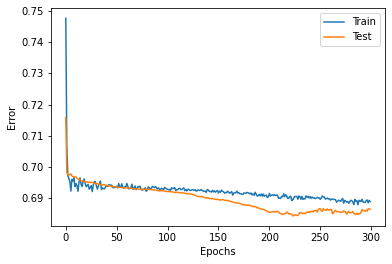

In [862]:
plt.plot(range(len(record_train_loss)), record_train_loss, label="Train")
plt.plot(range(len(record_test_loss)), record_test_loss, label="Test")
plt.legend()

# plt.xlim(0,100)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [130]:
import csv

In [134]:
# csv_path = "pread_AI.csv"
# headers = ','.join(t.columns.to_list())
# with open(csv_path, "w", encoding="utf_8") as csv_file:
#     csv_file.write(headers + '\n')
pred_list = []
for data_raw in dataset:
    data = torch.Tensor(data_raw[0]).to(device)
    pred = model(data)
    pred = F.softmax(pred, dim=0)
    pred_list.append(pred.tolist())

    # with open(csv_path, 'a') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pred_list)

In [135]:
pred_list

[[0.08702342212200165, 0.9129766225814819],
 [0.06147318333387375, 0.9385268092155457],
 [0.07488644123077393, 0.9251135587692261],
 [0.08388034254312515, 0.9161196351051331],
 [0.06027897447347641, 0.9397210478782654],
 [0.06892416626214981, 0.9310758709907532],
 [0.08426136523485184, 0.9157386422157288],
 [0.0808374211192131, 0.9191626310348511],
 [0.06676792353391647, 0.9332321286201477],
 [0.07607035338878632, 0.9239296913146973],
 [0.08636221289634705, 0.9136377573013306],
 [0.06646908074617386, 0.9335309267044067],
 [0.07147534191608429, 0.9285246133804321],
 [0.05728058144450188, 0.9427194595336914],
 [0.06279855221509933, 0.9372014403343201],
 [0.0729052945971489, 0.9270946979522705],
 [0.06216507405042648, 0.9378349184989929],
 [0.08772323280572891, 0.9122767448425293],
 [0.0642496645450592, 0.9357503652572632],
 [0.08641189336776733, 0.9135881066322327],
 [0.08977402746677399, 0.9102259874343872],
 [0.0635579526424408, 0.9364420771598816],
 [0.087644562125206, 0.9123554229736

In [62]:
if (data[-1] - data[-2]):
    data.pop()
    data.append(1)
else:
    data.pop()
    data.append(0)

In [63]:
# 最初に要素を追加
data.insert(0, '9984.T')

# リストをNumPy配列に変換
data = np.array([data])

# hist['Close'].valuesを1行にしたDataFrameを作成
df = pd.DataFrame(data)

# DataFrameを表示
print(df)

       0                 1                 2                 3   \
0  9984.T  6399.98974609375  6378.06494140625  6329.23291015625   

                 4               5               6             7   \
0  6343.18505859375  6588.341796875  6717.896484375  6608.2734375   

                 8                 9   ...                13  \
0  6558.44482421875  6694.97509765625  ...  6176.75732421875   

                 14             15      16      17      18      19      20  \
0  6401.98291015625  6348.16796875  6397.0  6298.0  6335.0  6250.0  6203.0   

       21 22  
0  6074.0  1  

[1 rows x 23 columns]


In [54]:
data

array([['9984.T', '6399.98974609375', '6378.06494140625',
        '6329.23291015625', '6343.18505859375', '6588.341796875',
        '6717.896484375', '6608.2734375', '6558.44482421875',
        '6694.97509765625', '6474.732421875', '6439.8525390625',
        '6235.55517578125', '6176.75732421875', '6401.98291015625',
        '6348.16796875', '6397.0', '6298.0', '6335.0', '6250.0',
        '6203.0', '6074.0', '6082.0']], dtype='<U32')

In [51]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,6399.989746,6378.064941,6329.23291,6343.185059,6588.341797,6717.896484,6608.273438,6558.444824,6694.975098,6474.732422,...,6176.757324,6401.98291,6348.167969,6397.0,6298.0,6335.0,6250.0,6203.0,6074.0,6082.0
